# Sale ForeCasting Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the data
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.shape

(9800, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
## Checking the missing values 
df.isnull().sum().sort_values(ascending=False)

Postal Code      11
Row ID            0
Order ID          0
Order Date        0
Ship Mode         0
Ship Date         0
Customer Name     0
Segment           0
Country           0
Customer ID       0
City              0
State             0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## EDA & Ploting & Feature Engineering 

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
## converting the string into date & Time 
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [9]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [10]:
## We can see the of categories does customer purchase

df['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [11]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [13]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [14]:
df = df.sort_values('Order Date')

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


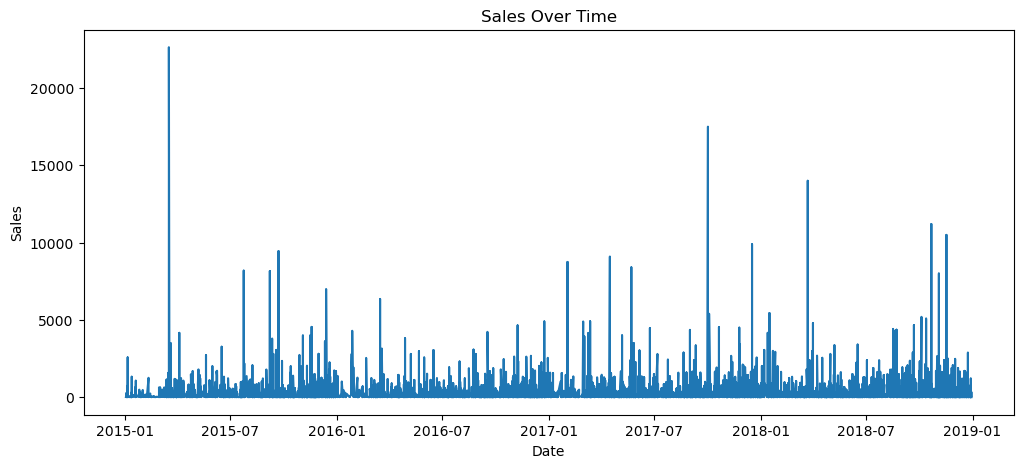

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['Order Date'], df['Sales'])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [17]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()

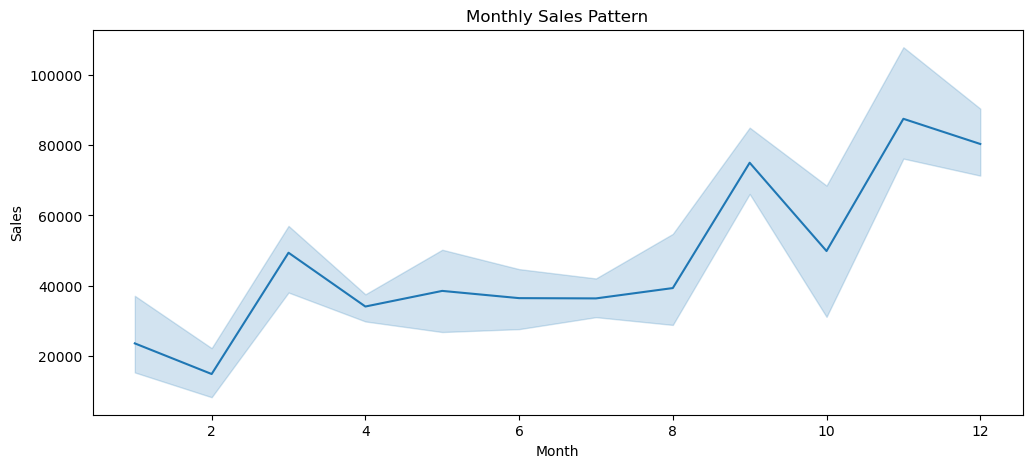

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title("Monthly Sales Pattern")
plt.show()

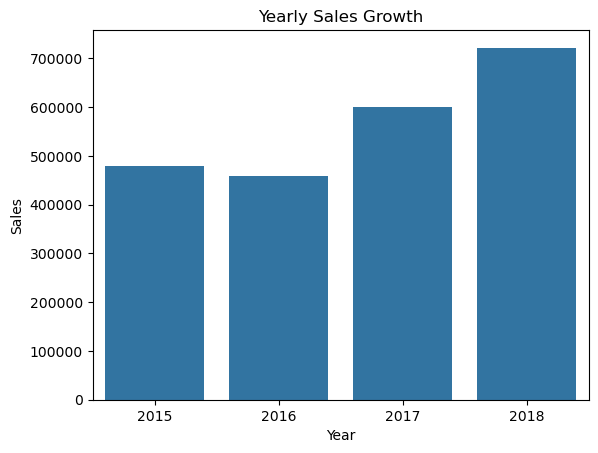

In [19]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

sns.barplot(x='Year', y='Sales', data=yearly_sales)
plt.title("Yearly Sales Growth")
plt.show()


In [20]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,1,2015
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,1,2015
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,1,2015
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,1,2015
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,1,2015


In [21]:
df['Delivery_day'] = (df['Ship Date']- df['Order Date']).dt.days


In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year,Delivery_day
7980,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,1,2015,4
741,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,1,2015,4
740,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,1,2015,4
739,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,1,2015,4
1759,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,1,2015,7


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 7980 to 5091
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 non

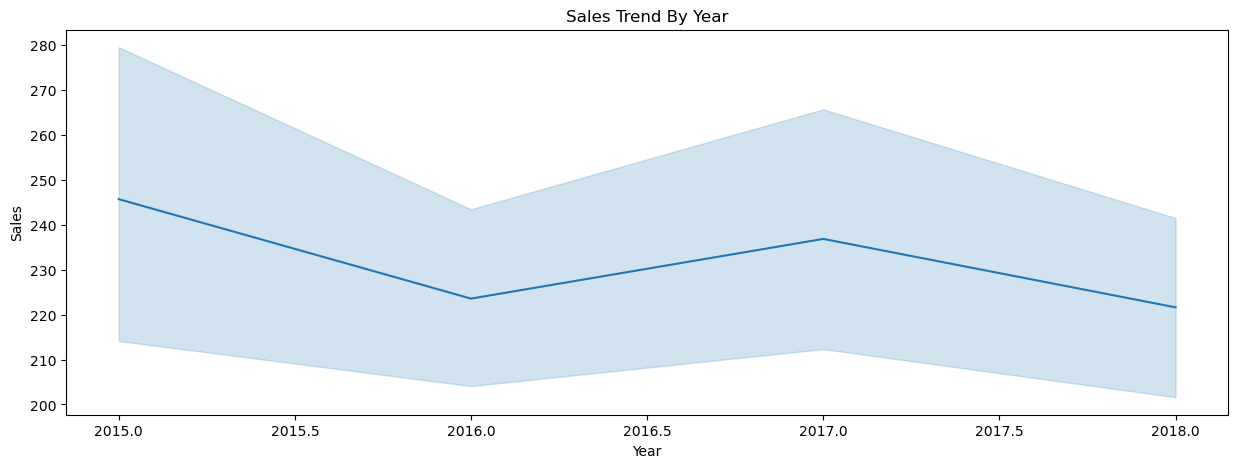

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y = 'Sales',data=df)
plt.title('Sales Trend By Year')
plt.show()

In [25]:
df['Quarter'] = df['Order Date'].dt.quarter

In [26]:
df['Weekday'] = df['Order Date'].dt.dayofweek

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month', 'Year', 'Delivery_day', 'Quarter',
       'Weekday'],
      dtype='object')

In [28]:
df['Delivery_day'] = df['Delivery_day'].replace(0,1)

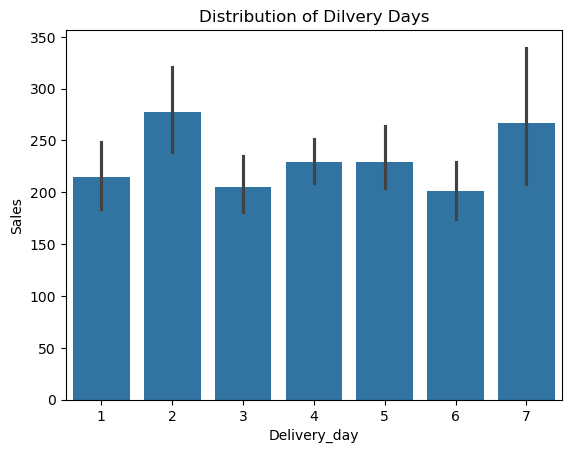

In [29]:
sns.barplot(x='Delivery_day', y='Sales', data=df)
plt.title('Distribution of Dilvery Days')
plt.show()

In [30]:
sale_week=df.groupby(['Weekday','Sub-Category'])['Sales'].sum().reset_index()

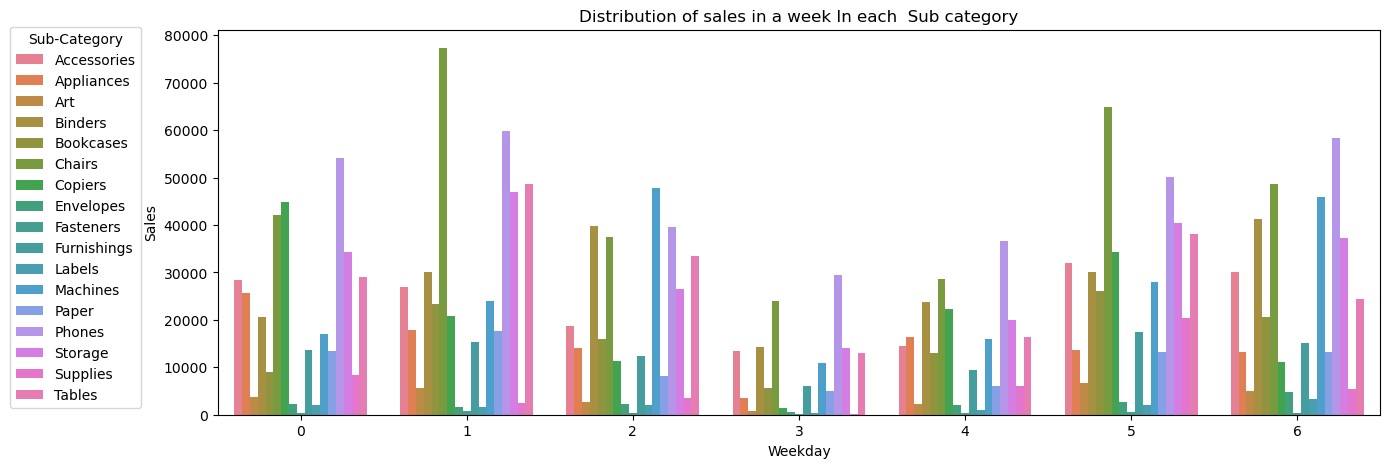

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x ='Weekday',y='Sales',hue ='Sub-Category',data = sale_week)
plt.title('Distribution of sales in a week In each  Sub category')
plt.legend(
    title='Sub-Category',
    loc='lower right',   # position inside
    bbox_to_anchor=(0.-0.06, 0.0)  # fine control 
)
plt.show()

In [32]:
## Fastest Delivery 

df['Fast_delivery'] = (df['Delivery_day'] <= 3).astype(int)

In [33]:
df['IsWeekend'] = df['Weekday'].isin([5,6]).astype(int)

In [34]:
df['EndOfQuarter'] = df['Month'].isin([3,6,9,12]).astype(int)
df['HighSale'] = (df['Sales'] > df['Sales'].median()).astype(int)


With this We can see the Catgoroy hold what kind of sub categories also 

In [35]:
cat_Sub_cat =  df.groupby('Category')['Sub-Category'].value_counts().reset_index()
cat_Sub_cat

,Category,Sub-Category,count
0,Furniture,Furnishings,931
1,Furniture,Chairs,607
2,Furniture,Tables,314
3,Furniture,Bookcases,226
4,Office Supplies,Binders,1492
5,Office Supplies,Paper,1338
6,Office Supplies,Storage,832
7,Office Supplies,Art,785
8,Office Supplies,Appliances,459
9,Office Supplies,Labels,357


In [36]:
sub_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=True)
sub_sales.head()

,Sub-Category,Sales
8,Fasteners,3001.960
10,Labels,12347.726
7,Envelopes,16128.046
2,Art,26705.410
15,Supplies,46420.308


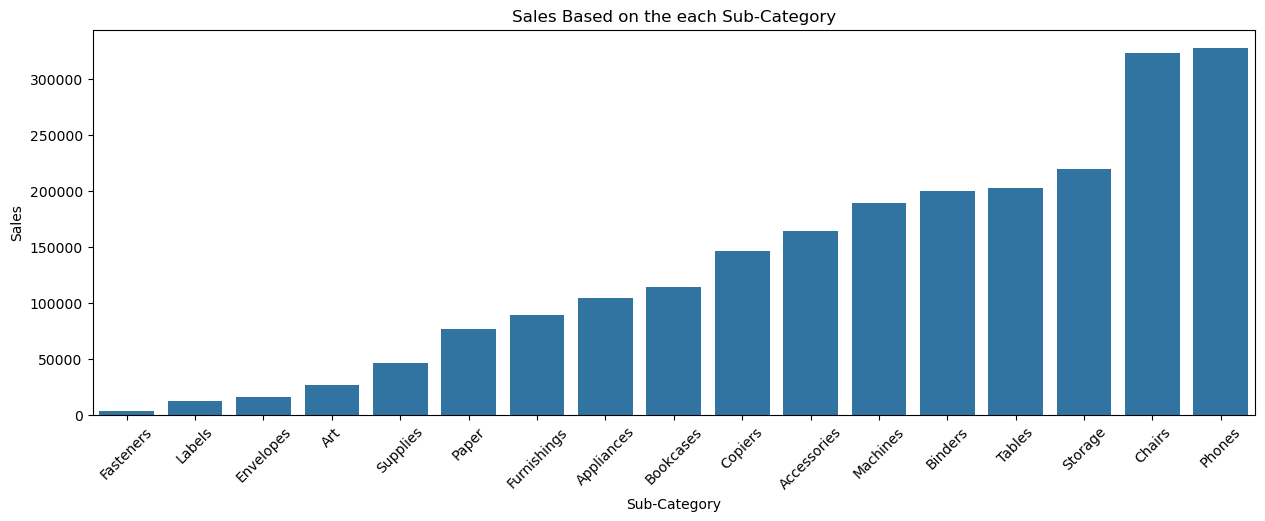

In [37]:
plt.figure(figsize=(15,5))
sns.barplot(x='Sub-Category',y='Sales',data=sub_sales)
plt.title('Sales Based on the each Sub-Category')
plt.xticks(rotation = 45)
plt.show()

Based on the visualiztion of the Sub-categories and sales We can clearly understand the demand of the product.Phone is highest demand product 
followed by the chairs & storage.similarly smaller items like Fasterners is low demand

In [38]:
df.shape

(9800, 27)

In [39]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Month', 'Year', 'Delivery_day', 'Quarter',
       'Weekday', 'Fast_delivery', 'IsWeekend', 'EndOfQuarter', 'HighSale'],
      dtype='object')

In [44]:
col_drop = ['Row ID','Customer Name', 'Customer ID', 'Order ID','Product ID','Product Name','Postal Code','HighSale','Order Date','Ship Date']

In [45]:
df = df.drop(col_drop,axis =1)

In [46]:
X = df.drop('Sales',axis =1)
y = df['Sales']

## Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [56]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include = 'object').columns

In [57]:
pd.DataFrame({'numeric columns':num_cols,'Catgory columns':cat_cols})

,numeric columns,Catgory columns
0,Month,Ship Mode
1,Year,Segment
2,Delivery_day,Country
3,Quarter,City
4,Weekday,State
5,Fast_delivery,Region
6,IsWeekend,Category
7,EndOfQuarter,Sub-Category


In [58]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ])

cat_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [59]:
preprocessor = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

In [63]:
lr = Pipeline([
    ('preprocessing',preprocessor),
    ('regressor',LinearRegression())
])

In [64]:
X_train,X_test,y_train,y_test =train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=42)

In [65]:
lr.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linear_pred = lr.predict(X_test)


print("MAE:", mean_absolute_error(y_test, linear_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, linear_pred)))
print("R2:", r2_score(y_test, linear_pred))

MAE: 239.59818362577886
RMSE: 553.7471540801181
R2: 0.24815291077892754


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
scores.mean()

np.float64(0.07471032575320055)

In [69]:
from sklearn.ensemble import RandomForestRegressor

Ran_for_reg = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [70]:
Ran_for_reg.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}


In [77]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    Ran_for_reg,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)


In [78]:
grid.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'regressor__max_depth': [None, 10, ...], 'regressor__min_samples_leaf': [1, 2], 'regressor__min_samples_split': [2, 5], 'regressor__n_estimators': [100, 200]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [74]:
print(grid.best_params_)
best_model = grid.best_estimator_

{'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 500}


In [75]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 232.17785447663798
RMSE: 720.2571058544648
R2: -0.27198389157324865
